In [ ]:
%matplotlib inline

import datacube
from deafrica_tools.plotting import rgb, display_map
import datacube
import odc.algo
import matplotlib.pyplot as plt
from datacube.utils.cog import write_cog

from deafrica_tools.plotting import display_map, rgb
dc = datacube.Datacube(app="04_Plotting")
# 15.85828652, 80.78694696
# 15.75418332, 81.02203692
# lat_range = (21, 22)
# lon_range = (72, 73)
lat_range = (21.07553702762837, 21.183778180226838)
lon_range = (72.63445103547193, 72.73881989435432)
time_range = ('2022-01-15', '2023-05-01')
# display_map(x=lon_range, y=lat_range)
ds = dc.load(product="landsat_8_c2_l2",
                 measurements=["red", "nir", "green"],
             x=lon_range,
             y=lat_range,
             time=time_range,
             output_crs='EPSG:32643',
             resolution=(-10, 10))
dataset = ds
# geobox = dataset.geobox

# # Get the CRS and affine transformation matrix
# crs = geobox.crs
# affine = geobox.affine

# # Get the latitude and longitude coordinates
# min_x, min_y = affine * (0, 0)
# max_x, max_y = affine * (geobox.width, geobox.height)

# min_lon, min_lat = crs.to_geodetic(min_x, min_y)
# max_lon, max_lat = crs.to_geodetic(max_x, max_y)

# print(f"Latitude range: {min_lat} to {max_lat}")
# print(f"Longitude range: {min_lon} to {max_lon}")
print(ds)
# dc.list_products()
# dc.list_measurements()

<xarray.Dataset>
Dimensions:      (time: 3, y: 1215, x: 1103)
Coordinates:
  * time         (time) datetime64[ns] 2022-09-14T10:15:14 ... 2023-04-29T08:...
  * y            (y) float64 2.344e+06 2.344e+06 ... 2.332e+06 2.332e+06
  * x            (x) float64 2.542e+05 2.542e+05 ... 2.652e+05 2.652e+05
    spatial_ref  int32 32643
Data variables:
    red          (time, y, x) uint16 10075 10042 10042 ... 10015 10015 9080
    nir          (time, y, x) uint16 10489 10926 10926 ... 11828 11828 10247
    green        (time, y, x) uint16 10446 10382 10382 10382 ... 9701 9701 8939
Attributes:
    crs:           EPSG:32643
    grid_mapping:  spatial_ref


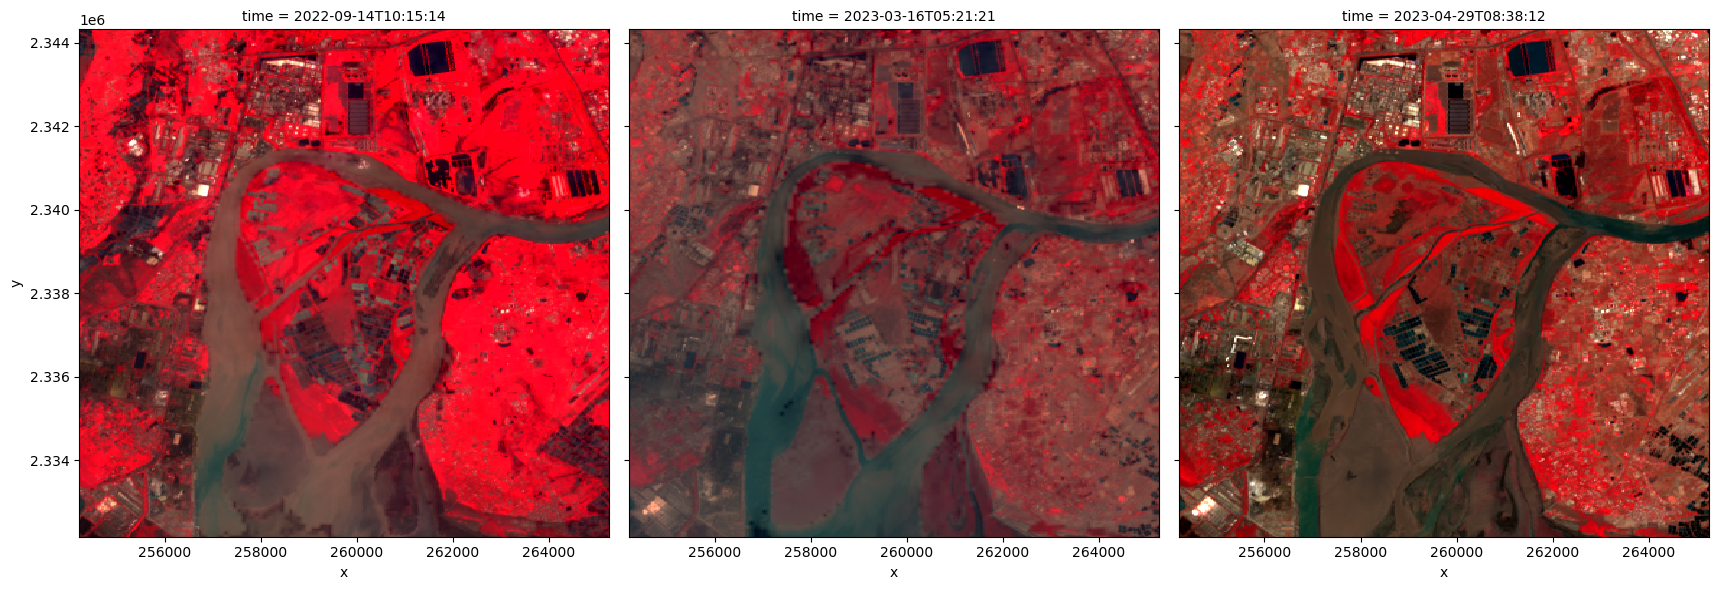

In [28]:
dataset = ds
# scl = ds['SCL_20m']
# clear_pixels = (scl != 3) & (scl != 8) & (scl != 9)
# print(clear_pixels)
# ndvi_masked = ndvi.where(clear_pixels)
# print(ndvi_masked)
rgb(ds, bands=['nir', 'red', 'green'], index=[0, 1, 2])

In [29]:
dataset =  odc.algo.to_f32(dataset)

# Calculate the components that make up the NDVI calculation
band_diff = dataset.nir - dataset.red
band_sum = dataset.nir + dataset.red

# Calculate NDVI and store it as a measurement in the original dataset
ndvi = band_diff / band_sum
print(ndvi)

<xarray.DataArray (time: 3, y: 1215, x: 1103)>
array([[[ 0.02013227,  0.04215948,  0.04215948, ...,  0.19429179,
          0.19429179,  0.16482766],
        [ 0.0258608 ,  0.02183758,  0.02183758, ...,  0.13316287,
          0.13316287,  0.1096051 ],
        [ 0.0258608 ,  0.02183758,  0.02183758, ...,  0.13316287,
          0.13316287,  0.1096051 ],
        ...,
        [ 0.10303508,  0.0827939 ,  0.0827939 , ...,  0.13026956,
          0.13026956,  0.11476981],
        [ 0.13505399,  0.09543052,  0.09543052, ...,  0.13949901,
          0.13949901,  0.10316207],
        [ 0.13505399,  0.09543052,  0.09543052, ...,  0.13949901,
          0.13949901,  0.10316207]],

       [[ 0.00923023,  0.02097173,  0.02097173, ...,  0.03307746,
          0.03307746,  0.02935712],
        [ 0.02629764,  0.05302341,  0.05302341, ...,  0.0134542 ,
          0.0134542 ,  0.01096097],
        [ 0.02629764,  0.05302341,  0.05302341, ...,  0.0134542 ,
          0.0134542 ,  0.01096097],
...
        [ 0.0135

<Figure size 800x800 with 0 Axes>

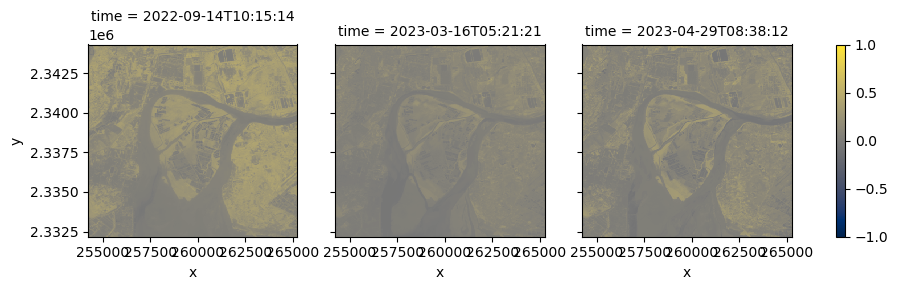

In [31]:
plt.figure(figsize=(8, 8))
ndvi.plot(col='time', cmap = 'cividis',vmin=-1, vmax=1, col_wrap=3)
plt.show()

In [1]:
%matplotlib inline

import datacube
from deafrica_tools.plotting import rgb, display_map
import datacube
import odc.algo
import matplotlib.pyplot as plt
from deafrica_tools.datahandling import load_ard
from datacube.utils.cog import write_cog
from datacube.utils.geometry import CRS

from deafrica_tools.plotting import display_map, rgb
dc = datacube.Datacube(app="04_Plotting")
# 15.85828652, 80.78694696
# 15.75418332, 81.02203692
# lat_range = (21, 22)
# lon_range = (72, 73)
lat_range = (21.07553702762837, 21.183778180226838)
lon_range = (72.63445103547193, 72.73881989435432)
time_range = ('2023-02-13', '2023-02-15')
# display_map(x=lon_range, y=lat_range)
# ds = load_ard(dc = dc, products=["s2a_sen2cor_granule", "landsat_8_c2_l2"],
#                  measurements=["red", "nir", "green"],
#              x=lon_range,
#              y=lat_range,
#              time=time_range,
#              output_crs='EPSG:32643',
#              resolution=(-10, 10))
# dataset = ds
# geobox = dataset.geobox

# # Get the CRS and affine transformation matrix
# crs = geobox.crs
# affine = geobox.affine
landsat_dataset = dc.load(product="landsat_8_c2_l2",
                          measurements=['red', 'green', 'blue', 'nir'],
                          time=time_range,
                          output_crs=CRS('EPSG:32643'),
                          resolution=(-30, 30),
                          x=lon_range,
                          y=lat_range)

print(landsat_dataset)
# Load Sentinel data
lat_range = (15.75418332, 15.85828652)
lon_range = (80.78694696, 81.02203692)
sentinel_dataset = dc.load(product="s2a_sen2cor_granule",
                 measurements=["red","green","blue", "nir"],
             x=lon_range,
             y=lat_range,
             time=time_range,
             output_crs=CRS('EPSG:32643'),
             resolution=(-30, 30))
print(sentinel_dataset)
# Merge the datasets
combined_dataset = landsat_dataset.merge(sentinel_dataset, compat="override")

# # Get the latitude and longitude coordinates
# min_x, min_y = affine * (0, 0)
# max_x, max_y = affine * (geobox.width, geobox.height)

# min_lon, min_lat = crs.to_geodetic(min_x, min_y)
# max_lon, max_lat = crs.to_geodetic(max_x, max_y)

# print(f"Latitude range: {min_lat} to {max_lat}")
# print(f"Longitude range: {min_lon} to {max_lon}")
print(combined_dataset)
# dc.list_products()
# dc.list_measurements()

<xarray.Dataset>
Dimensions:  ()
Data variables:
    *empty*
<xarray.Dataset>
Dimensions:  ()
Data variables:
    *empty*
<xarray.Dataset>
Dimensions:  ()
Data variables:
    *empty*


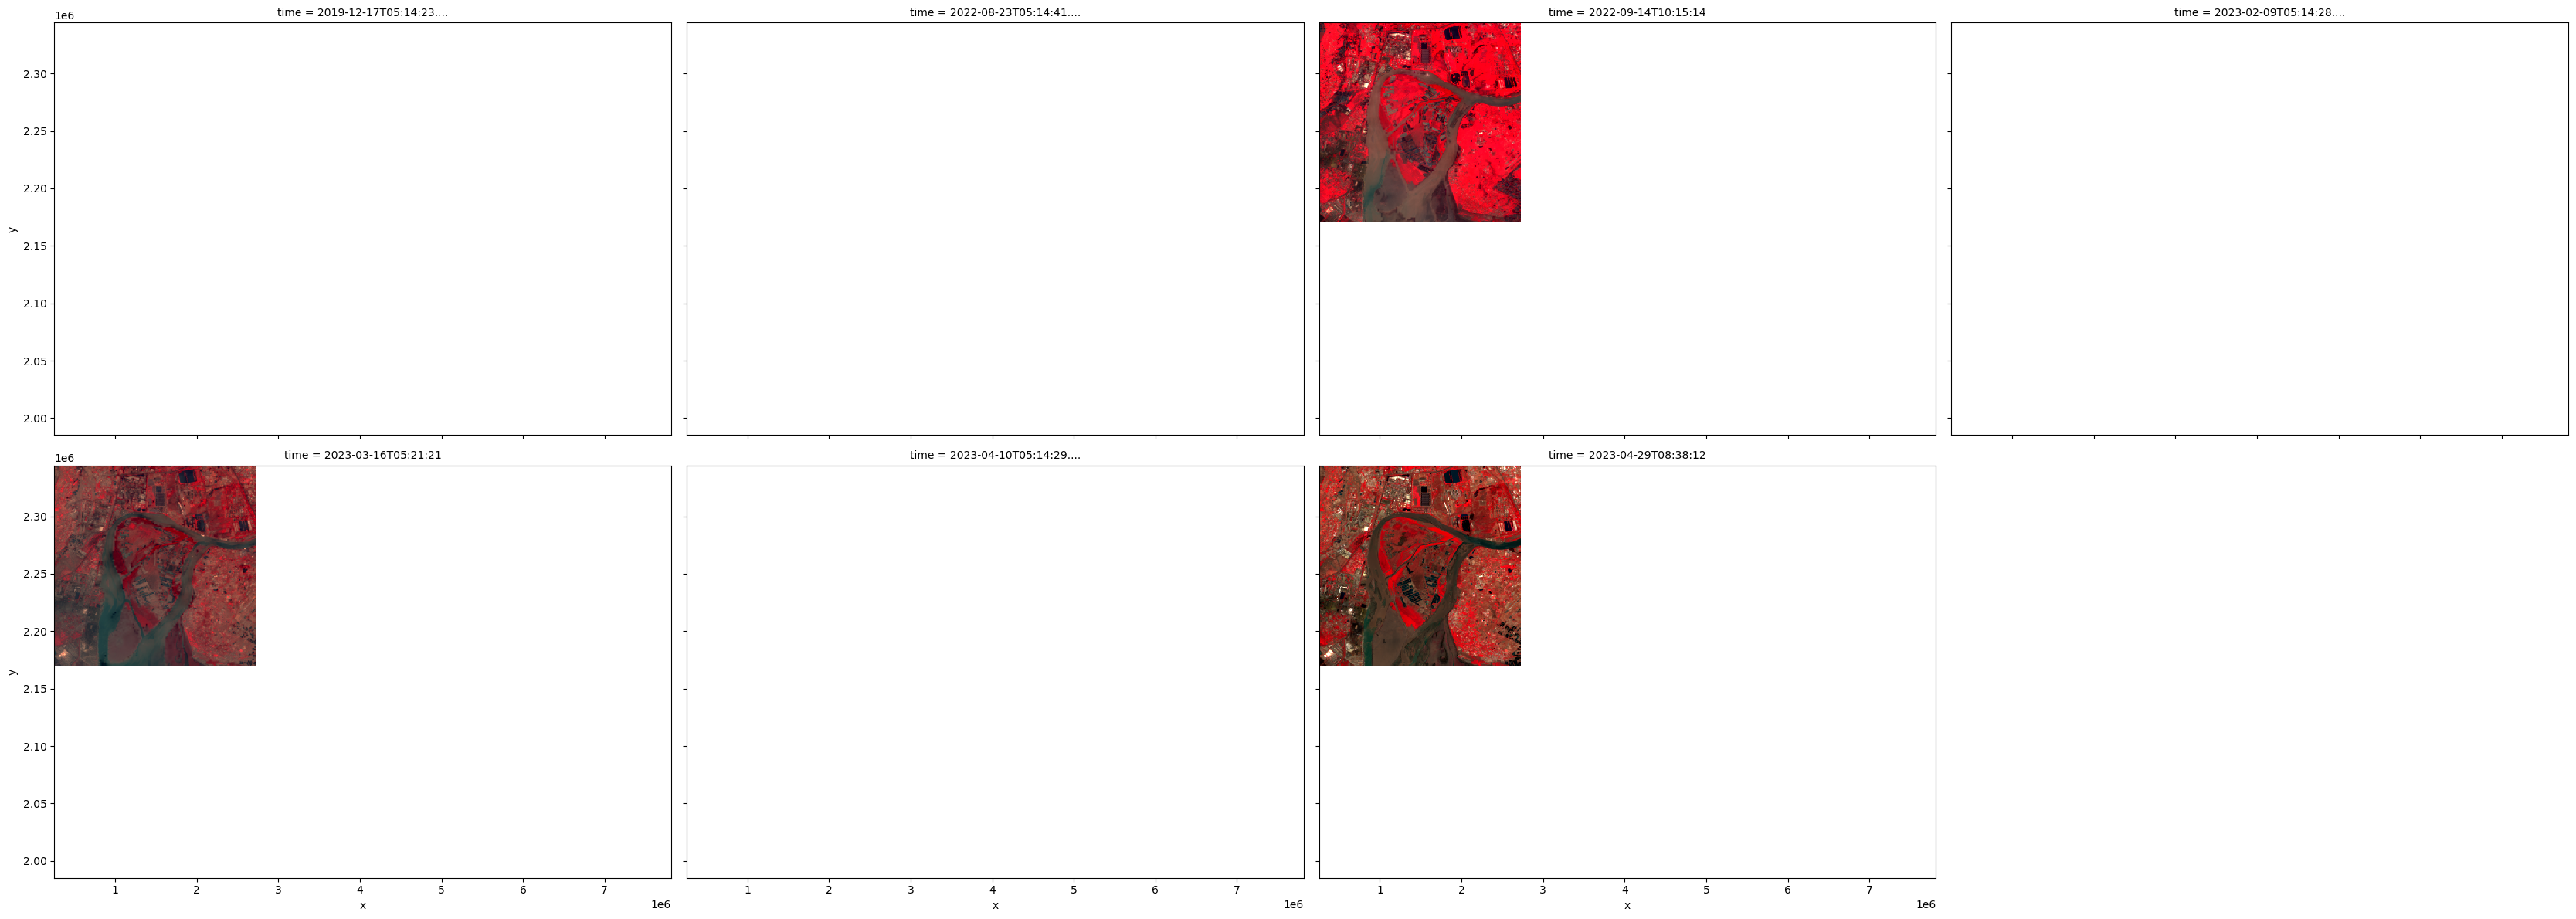

In [37]:
dataset = combined_dataset
# scl = ds['SCL_20m']
# clear_pixels = (scl != 3) & (scl != 8) & (scl != 9)
# print(clear_pixels)
# ndvi_masked = ndvi.where(clear_pixels)
# print(ndvi_masked)
rgb(dataset, bands=['nir', 'red', 'green'], index=[0, 1, 2, 3, 4, 5, 6])